# The purpose is to show the k93 models

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic','k93models','pickles','bkmodels',\
               'ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[8])

In [11]:
filelist1=os.listdir(SEDfile_dir+'/km01') 
filelist2=os.listdir(SEDfile_dir+'/km02') 
filelist3=os.listdir(SEDfile_dir+'/km03') 
filelist4=os.listdir(SEDfile_dir+'/km05') 
filelist5=os.listdir(SEDfile_dir+'/km10') 
filelist6=os.listdir(SEDfile_dir+'/km20') 
filelist7=os.listdir(SEDfile_dir+'/km25') 
filelist8=os.listdir(SEDfile_dir+'/km30') 
filelist9=os.listdir(SEDfile_dir+'/km35') 
filelist10=os.listdir(SEDfile_dir+'/km40') 
filelist11=os.listdir(SEDfile_dir+'/km45') 
filelist12=os.listdir(SEDfile_dir+'/km50') 
filelist13=os.listdir(SEDfile_dir+'/kp00') 
filelist14=os.listdir(SEDfile_dir+'/kp01') 
filelist15=os.listdir(SEDfile_dir+'/kp02') 
filelist16=os.listdir(SEDfile_dir+'/kp03') 
filelist17=os.listdir(SEDfile_dir+'/kp05') 
filelist18=os.listdir(SEDfile_dir+'/kp10') 

In [12]:
filelist1.remove('AA_README')
filelist2.remove('AA_README')
filelist3.remove('AA_README')
filelist4.remove('AA_README')
filelist5.remove('AA_README')
filelist6.remove('AA_README')
filelist7.remove('AA_README')
filelist8.remove('AA_README')
filelist9.remove('AA_README')
filelist10.remove('AA_README')
filelist11.remove('AA_README')
filelist12.remove('AA_README')
filelist13.remove('AA_README')
filelist14.remove('AA_README')
filelist15.remove('AA_README')
filelist16.remove('AA_README')
filelist17.remove('AA_README')
filelist18.remove('AA_README')

In [13]:
filelist=filelist1 + filelist2 + filelist3 + filelist4 + filelist5+ filelist6 + filelist7 + filelist8 + filelist9 + \
filelist10 + filelist11 + filelist12 + filelist13 + filelist14 + filelist15+ filelist16 + filelist17 + filelist18 

In [14]:
filelist1_group = [os.path.join('km01',f) for f in filelist1 if f.endswith('.fits')]
filelist2_group = [os.path.join('km02',f) for f in filelist2 if f.endswith('.fits')]
filelist3_group = [os.path.join('km03',f) for f in filelist3 if f.endswith('.fits')]
filelist4_group = [os.path.join('km05',f) for f in filelist4 if f.endswith('.fits')]
filelist5_group = [os.path.join('km10',f) for f in filelist5 if f.endswith('.fits')]
filelist6_group = [os.path.join('km20',f) for f in filelist6 if f.endswith('.fits')]
filelist7_group = [os.path.join('km25',f) for f in filelist7 if f.endswith('.fits')]
filelist8_group = [os.path.join('km30',f) for f in filelist8 if f.endswith('.fits')]
filelist9_group = [os.path.join('km35',f) for f in filelist9 if f.endswith('.fits')]
filelist10_group = [os.path.join('km40',f) for f in filelist10 if f.endswith('.fits')]
filelist11_group = [os.path.join('km45',f) for f in filelist11 if f.endswith('.fits')]
filelist12_group = [os.path.join('km50',f) for f in filelist12 if f.endswith('.fits')]
filelist13_group = [os.path.join('kp00',f) for f in filelist13 if f.endswith('.fits')]
filelist14_group = [os.path.join('kp01',f) for f in filelist14 if f.endswith('.fits')]
filelist15_group = [os.path.join('kp02',f) for f in filelist15 if f.endswith('.fits')]
filelist16_group = [os.path.join('kp03',f) for f in filelist16 if f.endswith('.fits')]
filelist17_group = [os.path.join('kp05',f) for f in filelist17 if f.endswith('.fits')]
filelist18_group = [os.path.join('kp10',f) for f in filelist18 if f.endswith('.fits')]

In [15]:
filelist_group=filelist1_group + filelist2_group + filelist3_group + filelist4_group + filelist5_group+ \
filelist6_group + filelist7_group + filelist8_group + filelist9_group + filelist10_group + filelist11_group + filelist12_group + filelist5_group+ \
filelist13_group + filelist14_group + filelist15_group + filelist16_group + filelist17_group + filelist18_group

In [16]:
#fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

In [17]:
#fits_files.remove('bzspectype.fits')

## Find the star-names in the files

In [18]:
fits_files=filelist_group

In [19]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [20]:
obj_headers[0]

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
ORIGIN  = 'STScI-STSDAS/TABLES' / Tables version 1999-03-22                     
FILENAME= 'km01_10000.fits'    / name of file                                   
TEFF    =                10000                                                  
LOG_Z   = -1.00000000000000E-01                                                 
HISTORY   g20               

In [21]:
obj_temperatures = []
obj_log_z_all = []
index=0
for hdr in obj_headers: 
        obj_temp=obj_headers[index]['TEFF']
        obj_logz=obj_headers[index]['LOG_Z']
        obj_temperatures.append(obj_temp)
        obj_log_z_all.append(obj_logz)
        index+=1

In [22]:
print obj_temperatures

[10000, 10500, 11000, 11500, 12000, 12500, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 3500, 35000, 3750, 37500, 4000, 40000, 4250, 42500, 4500, 45000, 4750, 47500, 5000, 50000, 5250, 5500, 5750, 6000, 6250, 6500, 6750, 7000, 7250, 7500, 7750, 8000, 8250, 8500, 8750, 9000, 9250, 9500, 9750, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 3500, 35000, 3750, 37500, 4000, 40000, 4250, 42500, 4500, 45000, 4750, 47500, 5000, 50000, 5250, 5500, 5750, 6000, 6250, 6500, 6750, 7000, 7250, 7500, 7750, 8000, 8250, 8500, 8750, 9000, 9250, 9500, 9750, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 3

In [23]:
fits_files=filelist

In [24]:
obj_names2 = []
index=0
obj_temp = []

for thefile in fits_files:
    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
    thenames=re.findall('([a-z].+_[0-9].+).fits$',thefile) 
    temp=re.findall('([a-z].+_[0-9].+).fits$',thefile) 
    if(len(thenames)>0):
        obj_names2.append(thenames[0])
    else:
        print 'bad file ',thefile
    index+=1

In [25]:
print obj_names2

['km01_10000', 'km01_10500', 'km01_11000', 'km01_11500', 'km01_12000', 'km01_12500', 'km01_13000', 'km01_14000', 'km01_15000', 'km01_16000', 'km01_17000', 'km01_18000', 'km01_19000', 'km01_20000', 'km01_21000', 'km01_22000', 'km01_23000', 'km01_24000', 'km01_25000', 'km01_26000', 'km01_27000', 'km01_28000', 'km01_29000', 'km01_30000', 'km01_31000', 'km01_32000', 'km01_33000', 'km01_34000', 'km01_3500', 'km01_35000', 'km01_3750', 'km01_37500', 'km01_4000', 'km01_40000', 'km01_4250', 'km01_42500', 'km01_4500', 'km01_45000', 'km01_4750', 'km01_47500', 'km01_5000', 'km01_50000', 'km01_5250', 'km01_5500', 'km01_5750', 'km01_6000', 'km01_6250', 'km01_6500', 'km01_6750', 'km01_7000', 'km01_7250', 'km01_7500', 'km01_7750', 'km01_8000', 'km01_8250', 'km01_8500', 'km01_8750', 'km01_9000', 'km01_9250', 'km01_9500', 'km01_9750', 'km02_10000', 'km02_10500', 'km02_11000', 'km02_11500', 'km02_12000', 'km02_12500', 'km02_13000', 'km02_14000', 'km02_15000', 'km02_16000', 'km02_17000', 'km02_18000', 'km

In [26]:
obj_names=obj_names2

In [27]:
obj_files=filelist_group

In [28]:
objames_and_objfiles = zip(obj_names, obj_files)
objames_and_objtemp = zip(obj_names, obj_temperatures)
objtemp_and_objlogz = zip(obj_temperatures,obj_log_z_all)

In [29]:
objtemp_and_objlogz

[(10000, -0.1),
 (10500, -0.1),
 (11000, -0.1),
 (11500, -0.1),
 (12000, -0.1),
 (12500, -0.1),
 (13000, -0.1),
 (14000, -0.1),
 (15000, -0.1),
 (16000, -0.1),
 (17000, -0.1),
 (18000, -0.1),
 (19000, -0.1),
 (20000, -0.1),
 (21000, -0.1),
 (22000, -0.1),
 (23000, -0.1),
 (24000, -0.1),
 (25000, -0.1),
 (26000, -0.1),
 (27000, -0.1),
 (28000, -0.1),
 (29000, -0.1),
 (30000, -0.1),
 (31000, -0.1),
 (32000, -0.1),
 (33000, -0.1),
 (34000, -0.1),
 (3500, -0.1),
 (35000, -0.1),
 (3750, -0.1),
 (37500, -0.1),
 (4000, -0.1),
 (40000, -0.1),
 (4250, -0.1),
 (42500, -0.1),
 (4500, -0.1),
 (45000, -0.1),
 (4750, -0.1),
 (47500, -0.1),
 (5000, -0.1),
 (50000, -0.1),
 (5250, -0.1),
 (5500, -0.1),
 (5750, -0.1),
 (6000, -0.1),
 (6250, -0.1),
 (6500, -0.1),
 (6750, -0.1),
 (7000, -0.1),
 (7250, -0.1),
 (7500, -0.1),
 (7750, -0.1),
 (8000, -0.1),
 (8250, -0.1),
 (8500, -0.1),
 (8750, -0.1),
 (9000, -0.1),
 (9250, -0.1),
 (9500, -0.1),
 (9750, -0.1),
 (10000, -0.2),
 (10500, -0.2),
 (11000, -0.2),
 (

## Make a dictionary of filenames

In [30]:
#OBJDict= {}
#for obj,thefile in objames_and_objfiles:
#    print obj,': '
#    OBJDict[obj]=thefile
#    print OBJDict[obj] 

## Plot the SED

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/ticker.py:2039: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


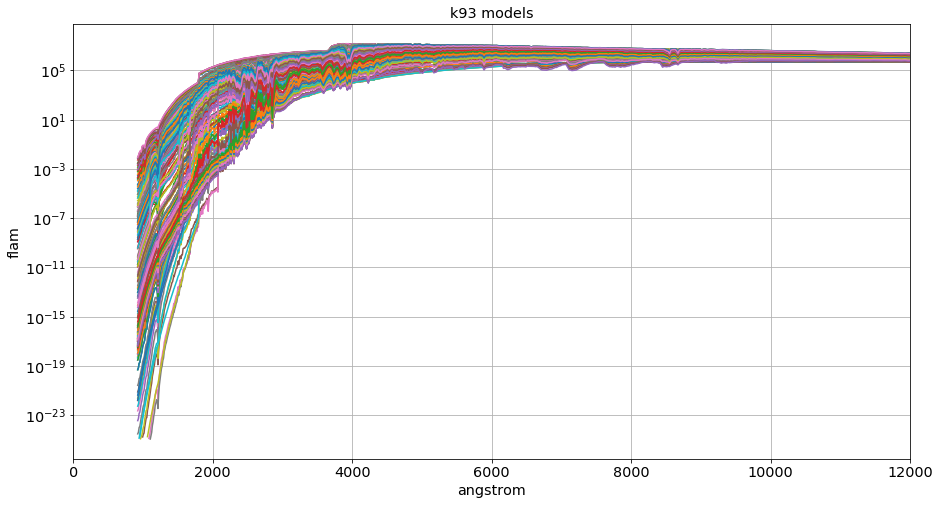

In [31]:
for temp,logz in objtemp_and_objlogz:
    #sed = S.Icat('k93models', temp, 0, -logz)    
    sed = S.Icat('k93models', temp, logz,0)      
    plt.semilogy(sed.wave,sed.flux)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    plt.title("k93 models")
    plt.savefig("k93.png")